In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings

In [9]:
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/housing_price_dataset.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [3]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [4]:
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [5]:
df['Neighborhood'].value_counts()

Suburb    16721
Rural     16676
Urban     16603
Name: Neighborhood, dtype: int64

# **PLOTTING**

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

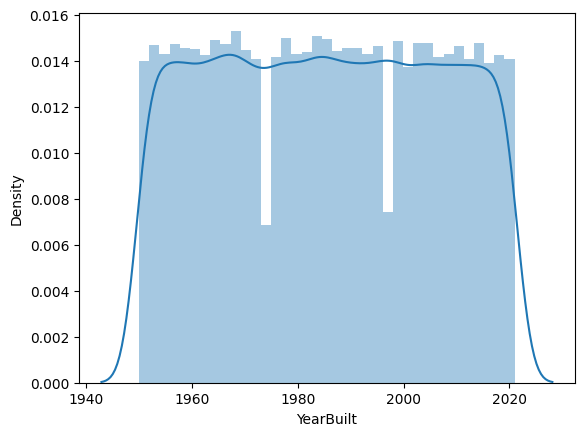

In [10]:
sns.distplot(df['YearBuilt']);

In [11]:
df.shape

(50000, 6)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
enc = LabelEncoder()

In [17]:
df['Neighborhood'] = enc.fit_transform(df['Neighborhood'])

In [19]:
df['Neighborhood'].value_counts()

1    16721
0    16676
2    16603
Name: Neighborhood, dtype: int64

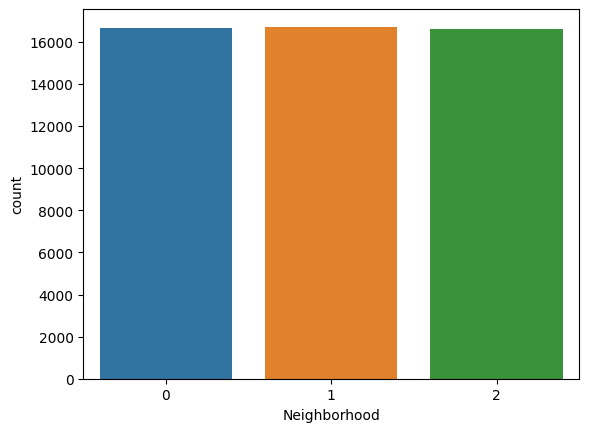

In [20]:
sns.countplot(data=df, x='Neighborhood');

# **PREPROCESSING**

In [22]:
X = df.drop('Price', axis=1)
y = df['Price']

In [23]:
data_X = tf.constant(X)
data_y = tf.constant(y)

In [24]:
data_X

<tf.Tensor: shape=(50000, 5), dtype=int64, numpy=
array([[2126,    4,    1,    0, 1969],
       [2459,    3,    2,    0, 1980],
       [1860,    2,    1,    1, 1970],
       ...,
       [2979,    5,    3,    1, 1962],
       [2596,    5,    2,    0, 1984],
       [1572,    5,    3,    0, 2011]])>

In [25]:
data_X.shape

TensorShape([50000, 5])

In [28]:
TRAIN_SIZE = 0.8
VAL_SIZE = 0.1
TEST_SIZE = 0.1

DATA_SIZE = len(data_X)

In [30]:
X_train, y_train = data_X[:int(TRAIN_SIZE * DATA_SIZE)], data_y[:int(TRAIN_SIZE * DATA_SIZE)]

rest_X, rest_y = data_X[int(TRAIN_SIZE * DATA_SIZE):], data_y[int(TRAIN_SIZE * DATA_SIZE):]

X_val, y_val = rest_X[:int(VAL_SIZE * DATA_SIZE)], rest_y[:int(VAL_SIZE * DATA_SIZE)]
X_test, y_test = rest_X[int(VAL_SIZE * DATA_SIZE):], rest_y[int(VAL_SIZE * DATA_SIZE):]

In [32]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(40000, 5) (40000,)
(5000, 5) (5000,)
(5000, 5) (5000,)


# **MODEL BUILD**

In [36]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Normalization, InputLayer
from tensorflow.keras.optimizers import Adam

In [34]:
model = Sequential([
    Normalization(input_shape=X_train.shape[1:]),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(units=1, activation='relu')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 5)                 11        
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                192       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

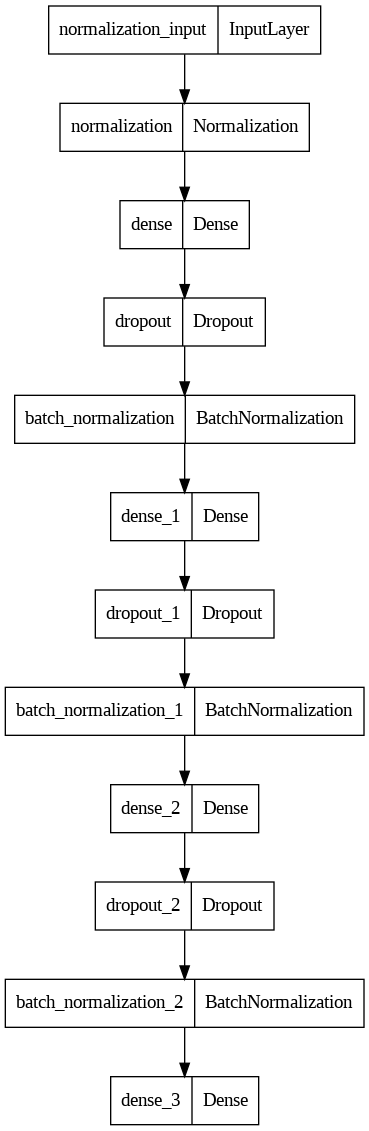

In [35]:
tf.keras.utils.plot_model(model)

In [37]:
model.compile(
    optimizer=Adam(learning_rate=0.1),
    loss='msle'
)

In [38]:
hist = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    verbose=2,
    batch_size=32
)

Epoch 1/20
1250/1250 - 5s - loss: 11.1301 - val_loss: 3.3003 - 5s/epoch - 4ms/step
Epoch 2/20
1250/1250 - 3s - loss: 1.9304 - val_loss: 1.0511 - 3s/epoch - 2ms/step
Epoch 3/20
1250/1250 - 3s - loss: 0.6612 - val_loss: 0.3072 - 3s/epoch - 2ms/step
Epoch 4/20
1250/1250 - 3s - loss: 0.2882 - val_loss: 0.1332 - 3s/epoch - 2ms/step
Epoch 5/20
1250/1250 - 3s - loss: 0.1995 - val_loss: 0.1249 - 3s/epoch - 2ms/step
Epoch 6/20
1250/1250 - 3s - loss: 0.1836 - val_loss: 0.1108 - 3s/epoch - 2ms/step
Epoch 7/20
1250/1250 - 3s - loss: 0.1773 - val_loss: 0.0991 - 3s/epoch - 3ms/step
Epoch 8/20
1250/1250 - 3s - loss: 0.1814 - val_loss: 0.1006 - 3s/epoch - 2ms/step
Epoch 9/20
1250/1250 - 3s - loss: 0.1762 - val_loss: 0.0950 - 3s/epoch - 2ms/step
Epoch 10/20
1250/1250 - 3s - loss: 0.1744 - val_loss: 0.1000 - 3s/epoch - 2ms/step
Epoch 11/20
1250/1250 - 3s - loss: 0.1728 - val_loss: 0.1275 - 3s/epoch - 3ms/step
Epoch 12/20
1250/1250 - 3s - loss: 0.1749 - val_loss: 0.1080 - 3s/epoch - 2ms/step
Epoch 13/20


In [39]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.1047


0.10472279042005539

In [40]:
y_pred = model.predict(X_test)
y_pred[:5]

157/157 [==============================] - 0s 2ms/step


array([[117967.57],
       [118513.09],
       [118403.2 ],
       [119029.12],
       [188748.95]], dtype=float32)

In [41]:
y_test[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([172045.95139058, 120774.57366517, 216778.65895499, 171788.80435307,
       315107.4567818 ])>

<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>

<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>

<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>

<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>
<img src='https://media.tenor.com/nrJ0FfU9WQ0AAAAi/funny.gif'>